# Ridge Regresyon
# Model

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [3]:
from sklearn.linear_model import Ridge

In [4]:
ridge_model = Ridge(alpha = 0.1).fit(X_train,y_train)

In [5]:
ridge_model

Ridge(alpha=0.1)

In [6]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [7]:
10**np.linspace(10,-2,100)*0.5

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

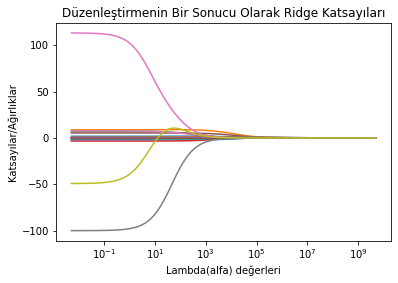

In [24]:
import matplotlib.pyplot as plt
lambdalar = 10**np.linspace(10,-2,100)*0.5
ridge_model = Ridge()
katsayilar = []
for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

plt.xlabel("Lambda(alfa) değerleri")
plt.ylabel("Katsayılar/Ağırlıklar")
plt.title("Düzenleştirmenin Bir Sonucu Olarak Ridge Katsayıları");

# Tahmin

In [9]:
y_pred = ridge_model.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test,y_pred))

357.05179222828355

# Model Tuning

In [11]:
lambdalar = 10**np.linspace(10,-2,100)*0.5
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [16]:
from sklearn.linear_model import RidgeCV
ridge_CV = RidgeCV(alphas = lambdalar,scoring = "neg_mean_squared_error",normalize = True)

In [17]:
ridge_CV.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [19]:
ridge_CV.alpha_

0.7599555414764666

In [22]:
ridge_tuned = Ridge(alpha = ridge_CV.alpha_,normalize = True).fit(X_train,y_train)

In [23]:
np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(X_test)))

386.68264297564144